In [1]:
import cv2

In [8]:
import numpy as np
#from scipy import ndimage
#import tifffile as tiff
import scipy
import matplotlib.pyplot as plt
import sys
#import flatten-dict
#import mcat

#from PIL import Image
#import pillow as plt


# ------- Changes start here -------

data = cv2.imread('C:\\Users\\james\\OneDrive\\Desktop\\VIT\\Sem III\\Image Processing\\Project\\Virus Dataset\\original-16bit\\class-001-sample-099-16bit.png'
, cv2.IMREAD_GRAYSCALE)


# print(data.ndim) = 2.. hence a 2d image

# ------- Changes end here -------



In [10]:
w=len(data)
l1=len(data[0])
hist,bins = np.histogram(data.ravel(),256,[0,256])
print("Histogram of the image:")
print (hist) #Histogram of the image calculate

#Step2, calculate Xa
num =0
denum=0
l=len(hist)
for i in range(1,l+1) :
    num+= hist[i-1]*i
    denum+=hist[i-1]

#Step3 Clipping threshold and calculate clipping hstogram
exposure = (1.0/l)*(num/(1.0*denum))
xa=int(round(l*(1-exposure)))
print("Exposure value:", exposure)
print("Threshold value:", xa)
print("l:",l)

clipthreshold =0

s=0
for i in range(1,l+1):
   s+=hist[i-1]
clipthreshold = (1.0/l)*s

hist_c=[]

for i in range(1, l+1):
    if(hist[i-1]>clipthreshold):
        hist_c.append(clipthreshold)
    else:
        hist_c.append(hist[i-1])

# print("Clipped Histogram of the image:")
# print (hist_c) #Clipped Histogram of the image
# print("Rounded exp value:", int(round(xa)))
#Step 4 Histogram Sub Division and Equalization
undexp= []
overexp= []
underexp= hist[0:int(round(xa+1))]
overexp= hist[int(round(xa+1)):l]

nl=0
nu=0

for i in range (0,xa+1):
    nl+=hist_c[i]
for i in range (xa+1, l):
    nu+=hist_c[i]

pl=[]
pu=[]
for i in range(0,int(round(xa+1))):
    # print(hist_c[i],"and", nl)
    pl.append(hist_c[i]/nl)

for i in range(int(round(xa+1)),l):
    pu.append(hist_c[i]/nu)
    # print(pu[i], ":::", i)


#Get corresponding CDF
cl =[]
cu =[]

cl.append(pl[0])
print("len",len(pl))
for r in range(1,len(pl)):
    cl.append(pl[r]+cl[r-1])

cu.append(pu[0])
for r in range(1,(len(pu))):
    cu.append(pu[r]+cu[r-1])

ESIHEoutput = [[0 for x in range(l1)] for y in range(w)]
# print("row and col",w, "and",l1)

# print("Data:",data[0]) #Check this output @Nikhil
for r in range(0,w ):
    for s in range (0,l1):
        if data[r][s]<(xa+1):
            f=xa*cl[data[r][s]+1]
            # print("r",r,"s",s)
            ESIHEoutput[r][s]=round(f)
            # print("ESIHE", r," n ", s, ":",ESIHEoutput[r][s])
        else:
            f=(xa+1)+(255-xa)*cu[(data[r][s]-(xa+1))+1]
            ESIHEoutput[r][s]=round(f)


print("\nRESULT:")

print("Output matrix:\n\n")
print(ESIHEoutput)

Histogram of the image:
[ 0  0  0  0  0  1  0  0  3  5  6  9 10 18  7  9  8  5  5  5  6  4  1  5
  7  6  7  7  4  7  6  6  5  2  6  6  3  6  1  4  4  6  4  3  5  6  5  5
  3  2  5  9  6  4  4  4  4  4 11  2  8  4  5  5  6  6  4  4  7  9 10  7
 14  6  5 11 15 13 16 27 24 27 37 33 38 24 39 55 59 34 50 38 42 58 30 41
 32 32 32 27 28 28 23 25 24 20 18 18 12 10  7  9  8  5 12  4 16  6  8  6
  7  9  8 11 10  7  5  8  4 10  6  5  4  6  3  3  4  2  6  6  3  8  2  3
  3  4  6  4  2  1  2  3  1  2  1  2  0  1  2  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
Exposure value: 0.3366811049970256
Threshold value: 170
l: 256
len 171

RESULT:
Output matrix:


[[12.0, 16.0, 12.0, 2.0, 0.0, 5.0, 10.0, 10.0, 8.0, 3.0, 3.0, 6.0, 9.0, 9.0, 13.0, 20.0, 21.0, 20.0

C:\Users\james\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: RuntimeWarning: invalid value encountered in longlong_scalars


In [12]:
check = np.array(ESIHEoutput)

In [13]:
check.shape

(41, 41)

In [14]:
print(check)

[[ 12.  16.  12. ... 109. 102. 103.]
 [ 10.   8.   5. ... 121. 109. 109.]
 [  9.   3.   3. ... 119. 112. 113.]
 ...
 [142. 141. 145. ...  89. 102.  99.]
 [150. 151. 148. ...  88. 101.  99.]
 [147. 138. 122. ...  82.  96. 105.]]


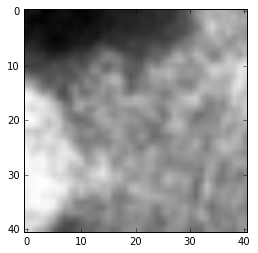

In [15]:
plt.imshow(check,cmap=plt.cm.gray)